# Exploration: NHGIS files

In [24]:
import geopandas as gpd
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
from numpy import inf as inf

%matplotlib inline

In [2]:
# raw data
zipped_files_path = Path("../data/raw/")

In [3]:
zipped_files = list(zipped_files_path.glob("*.zip"))

zipped_files

[WindowsPath('../data/raw/nhgis0003_csv.zip'),
 WindowsPath('../data/raw/nhgis0003_shape.zip')]

In [4]:
csv_zipped = ZipFile(zipped_files[0])
shape_zipped = ZipFile(zipped_files[1])

In [5]:
extrafiles_path = Path("../data/interim/extracted/")

In [6]:
csv_zipped.extractall(extrafiles_path / 'csv_files')
shape_zipped.extractall(extrafiles_path / 'shape_files')

In [7]:
csv_extracted_dir = extrafiles_path / 'csv_files'
shape_extracted_dir = extrafiles_path / 'shape_files'

In [8]:
!ls $csv_extracted_dir

nhgis0003_csv


In [9]:
!ls $shape_extracted_dir

nhgis0003_shape


In [10]:
# from realpython.com (https://realpython.com/python-pathlib/#display-a-directory-tree)
def tree(directory):
    print(f'+ {directory}')
    for path in sorted(directory.rglob('*')):
        depth = len(path.relative_to(directory).parts)
        spacer = '    ' * depth
        print(f'{spacer}+ {path.name}')

In [11]:
tree(shape_extracted_dir)

+ ..\data\interim\extracted\shape_files
    + nhgis0003_shape
        + nhgis0003_shapefile_tl2017_us_county_2017.zip


In [12]:
ZipFile(shape_extracted_dir / 'nhgis0003_shape' / 'nhgis0003_shapefile_tl2017_us_county_2017.zip').extractall(extrafiles_path / 'county_shapes')

In [13]:
tree(extrafiles_path)

+ ..\data\interim\extracted
    + county_shapes
        + US_county_2017.cpg
        + US_county_2017.dbf
        + US_county_2017.prj
        + US_county_2017.sbn
        + US_county_2017.sbx
        + US_county_2017.shp
        + US_county_2017.shp.xml
        + US_county_2017.shx
    + csv_files
        + nhgis0003_csv
            + nhgis0003_ds233_20175_2017_county.csv
            + nhgis0003_ds233_20175_2017_county_codebook.txt
    + shape_files
        + nhgis0003_shape
            + nhgis0003_shapefile_tl2017_us_county_2017.zip


In [14]:
geo_data = gpd.read_file(extrafiles_path / 'county_shapes' / 'US_county_2017.shp')

geo_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GISJOIN,Shape_Leng,Shape_Area,geometry
0,01,001,00161526,01001,Autauga,Autauga County,06,H1,G4020,None,...,None,A,1.539615e+09,2.574427e+07,+32.5322367,-086.6464395,G0100010,210437.937131,1.565359e+09,POLYGON ((895625.2417000011 -524091.3958000001...
1,01,003,00161527,01003,Baldwin,Baldwin County,06,H1,G4020,380,...,None,A,4.117606e+09,1.133109e+09,+30.6592183,-087.7460666,G0100030,929387.642731,4.224572e+09,(POLYGON ((810181.1906000003 -770353.651499999...
2,01,005,00161528,01005,Barbour,Barbour County,06,H1,G4020,None,...,None,A,2.292145e+09,5.053870e+07,+31.8702531,-085.4051035,G0100050,272036.647209,2.342684e+09,"POLYGON ((1026117.2795 -548829.8852000004, 102..."
3,01,007,00161529,01007,Bibb,Bibb County,06,H1,G4020,142,...,None,A,1.612166e+09,9.603798e+06,+33.0158929,-087.1271475,G0100070,190850.538612,1.621770e+09,"POLYGON ((829901.363499999 -440039.0586000001,..."
4,01,009,00161530,01009,Blount,Blount County,06,H1,G4020,142,...,None,A,1.670079e+09,1.503986e+07,+33.9773575,-086.5664400,G0100090,242282.035418,1.685119e+09,POLYGON ((871831.0832999982 -318977.3201000001...


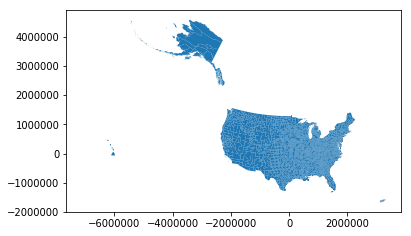

In [15]:
geo_data.plot()

In [16]:
educ_data = pd.read_csv(extrafiles_path / 'csv_files' / 'nhgis0003_csv' / 'nhgis0003_ds233_20175_2017_county.csv', encoding = 'latin-1')

educ_data.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,AH04M016,AH04M017,AH04M018,AH04M019,AH04M020,AH04M021,AH04M022,AH04M023,AH04M024,AH04M025
0,G0100010,2013-2017,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,...,156,770,388,331,521,362,473,457,216,179
1,G0100030,2013-2017,NaN,NaN,Alabama,1,Baldwin County,3,NaN,NaN,...,354,1507,760,891,1210,1123,1509,778,486,245
2,G0100050,2013-2017,NaN,NaN,Alabama,1,Barbour County,5,NaN,NaN,...,146,354,153,174,257,207,184,148,37,38
3,G0100070,2013-2017,NaN,NaN,Alabama,1,Bibb County,7,NaN,NaN,...,83,556,226,252,323,223,367,190,66,105
4,G0100090,2013-2017,NaN,NaN,Alabama,1,Blount County,9,NaN,NaN,...,193,569,285,403,448,467,421,213,98,74


In [17]:
common_cols = [col for col in educ_data.columns if col in geo_data.columns]

common_cols

['GISJOIN']

In [18]:
merged_data = geo_data.merge(educ_data, on = 'GISJOIN')

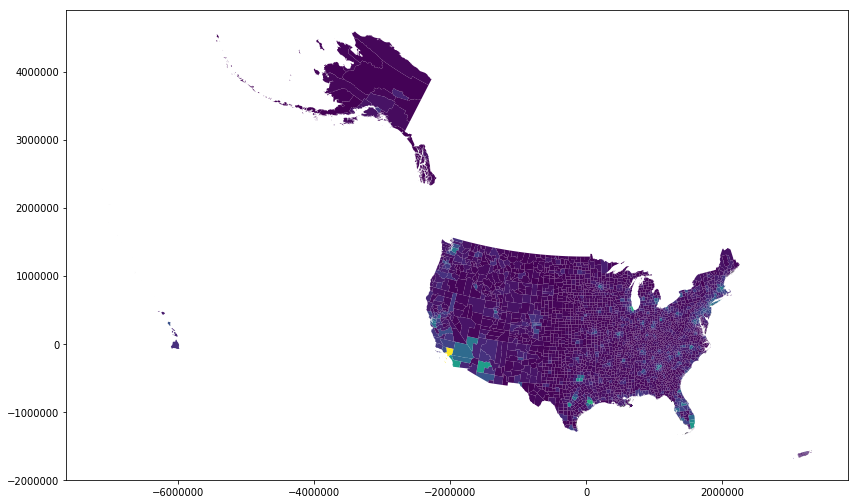

In [19]:
merged_data.plot(column = 'AH04M022', figsize = (14,14));

From the codebook we know the variables:

    Data Type (E):
        Estimates

            NAME_E:      Area Name

        Table 1:     Educational Attainment for the Population 25 Years and Over
        Universe:    Population 25 years and over
        Source code: B15003
        NHGIS code:  AH04
            AH04E001:    Total
            AH04E002:    No schooling completed
            AH04E003:    Nursery school
            AH04E004:    Kindergarten
            AH04E005:    1st grade
            AH04E006:    2nd grade
            AH04E007:    3rd grade
            AH04E008:    4th grade
            AH04E009:    5th grade
            AH04E010:    6th grade
            AH04E011:    7th grade
            AH04E012:    8th grade
            AH04E013:    9th grade
            AH04E014:    10th grade
            AH04E015:    11th grade
            AH04E016:    12th grade, no diploma
            AH04E017:    Regular high school diploma
            AH04E018:    GED or alternative credential
            AH04E019:    Some college, less than 1 year
            AH04E020:    Some college, 1 or more years, no degree
            AH04E021:    Associate's degree
            AH04E022:    Bachelor's degree
            AH04E023:    Master's degree
            AH04E024:    Professional school degree
            AH04E025:    Doctorate degree

We can then get B.A. share by dividing `AH04E022` / `AH04E001`

And B.A.+ share by dividing `AH04E022 + AH04E023 + AH04E024 + AH04E025 ` / `AH04E001`

In [20]:
merged_data['BA_share'] = (merged_data['AH04E022'] + merged_data['AH04E023'] + merged_data['AH04E024'] + merged_data['AH04E025']) / merged_data['AH04E001']

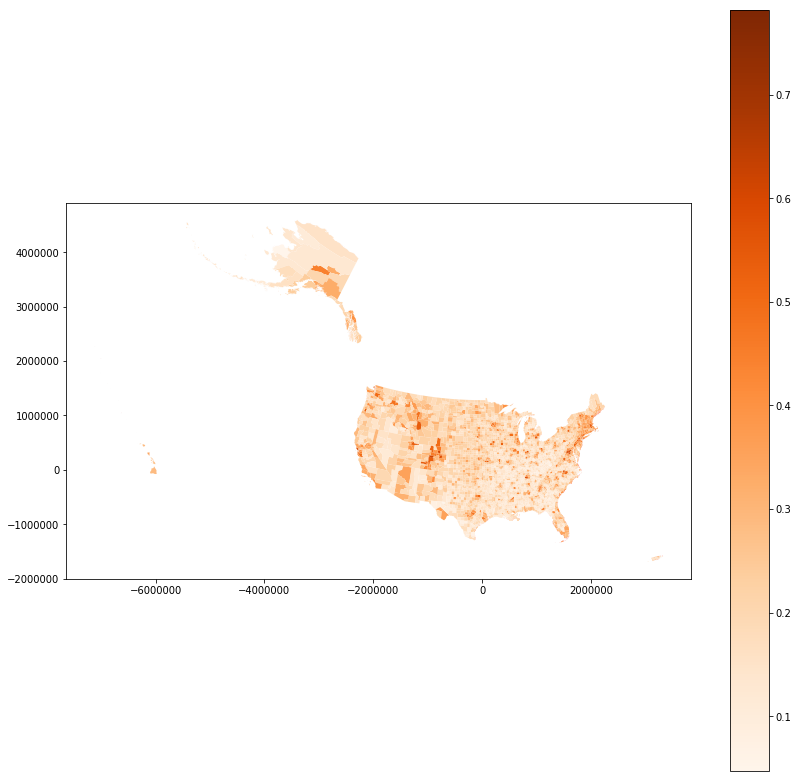

In [21]:
merged_data.plot(column = 'BA_share', figsize = (14,14), legend = True, cmap = 'Oranges');

In [22]:
for col in merged_data.columns:
    print(col)

STATEFP
COUNTYFP
COUNTYNS
GEOID
NAME
NAMELSAD
LSAD
CLASSFP
MTFCC
CSAFP
CBSAFP
METDIVFP
FUNCSTAT
ALAND
AWATER
INTPTLAT
INTPTLON
GISJOIN
Shape_Leng
Shape_Area
geometry
YEAR
REGIONA
DIVISIONA
STATE
STATEA
COUNTY
COUNTYA
COUSUBA
PLACEA
TRACTA
BLKGRPA
CONCITA
AIANHHA
RES_ONLYA
TRUSTA
AITSCEA
ANRCA
CBSAA
CSAA
METDIVA
NECTAA
CNECTAA
NECTADIVA
UAA
CDCURRA
SLDUA
SLDLA
ZCTA5A
SUBMCDA
SDELMA
SDSECA
SDUNIA
PUMA5A
BTTRA
BTBGA
NAME_E
AH04E001
AH04E002
AH04E003
AH04E004
AH04E005
AH04E006
AH04E007
AH04E008
AH04E009
AH04E010
AH04E011
AH04E012
AH04E013
AH04E014
AH04E015
AH04E016
AH04E017
AH04E018
AH04E019
AH04E020
AH04E021
AH04E022
AH04E023
AH04E024
AH04E025
NAME_M
AH04M001
AH04M002
AH04M003
AH04M004
AH04M005
AH04M006
AH04M007
AH04M008
AH04M009
AH04M010
AH04M011
AH04M012
AH04M013
AH04M014
AH04M015
AH04M016
AH04M017
AH04M018
AH04M019
AH04M020
AH04M021
AH04M022
AH04M023
AH04M024
AH04M025
BA_share


In [23]:
subset = merged_data[['STATE', 'COUNTY', 'BA_share', 'geometry']]

In [24]:
import geoplot.crs as gcrs
import geoplot
import matplotlib.pyplot as plt

In [25]:
subset.crs = {"init": "epsg:3857"}

subset_4326 = subset.to_crs(epsg = 4326)

ax = geoplot.polyplot(subset_4326, projection=gcrs.Orthographic(central_longitude=-98), figsize=(18, 14), column = 'BA_share');
ax.set_global()
#subset.plot(column = 'BA_share', ax = ax)
ax.outline_patch.set_visible(True)

C:\Users\sanchez\AppData\Local\Continuum\anaconda3\envs\vizzy\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\Users\sanchez\AppData\Local\Continuum\anaconda3\envs\vizzy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


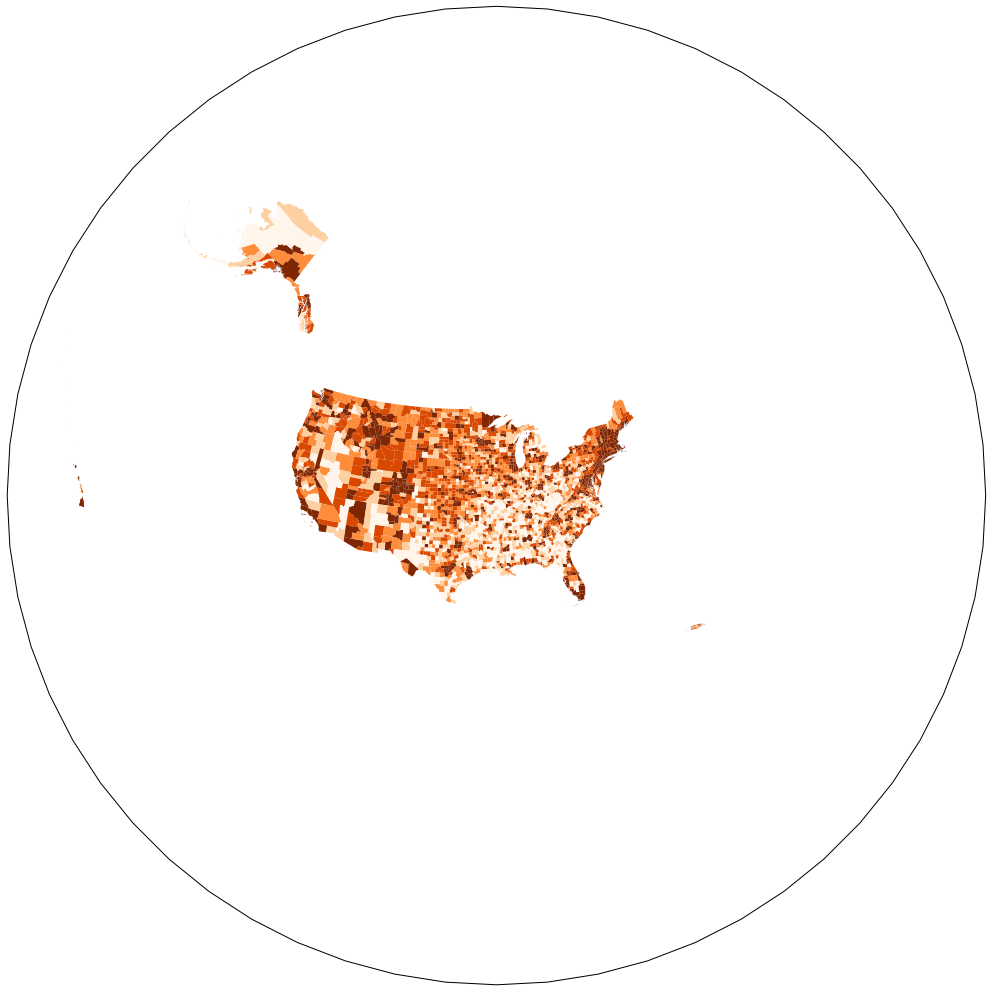

In [26]:
ax = geoplot.choropleth(subset_4326, hue='BA_share', cmap='Oranges', figsize=(18, 18), projection=gcrs.Orthographic());
ax.set_global()
ax.outline_patch.set_visible(True)
plt.savefig("../reports/figures/interim/ortho_choroplet.png", dpi=300)

In [25]:
mainland_4326 = subset_4326[(subset_4326['STATE'] != 'Alaska') & (subset_4326['STATE'] != 'Hawaii')]

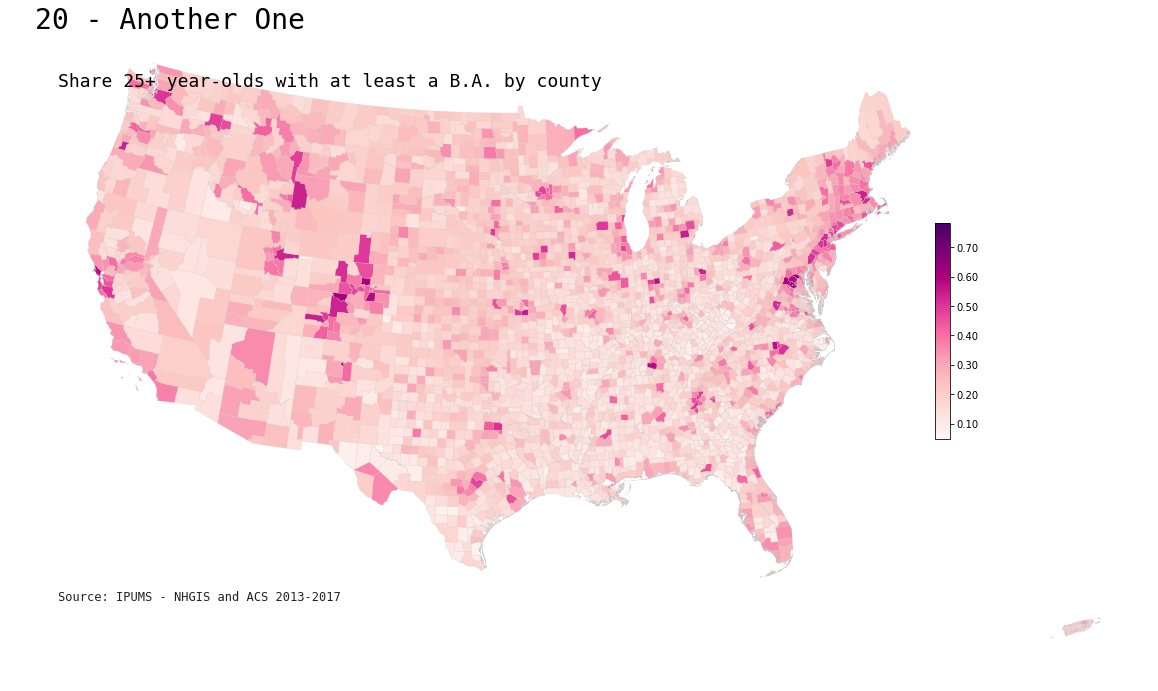

In [29]:
fig, ax = plt.subplots(1, figsize=(20, 12))

mainland_4326.plot(column='BA_share', cmap='RdPu', linewidth=0.2, ax=ax, edgecolor='#c8c8c8', legend = False,);
ax.axis('off');

# Now adding the colorbar
mappable = ax.collections[0]
cbaxes = fig.add_axes([0.75, 0.4, 0.01, 0.25]) 
fig.colorbar(mappable,cax = cbaxes, shrink = 0.5, format = '%.2f')

ax.set_title("20 - Another One", fontdict= {'fontsize': '28', 'fontweight': '5', 'fontfamily': 'monospace'}, loc = 'left', );
ax.annotate('Source: IPUMS - NHGIS and ACS 2013-2017', xy=(0., .12), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#222222', fontfamily='monospace');
ax.annotate('Share 25+ year-olds with at least a B.A. by county', xy=(0, .99), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 18, color = '#000000', fontfamily='monospace');

plt.savefig("../reports/figures/final/mainland_us_share_ba.png", dpi=400)

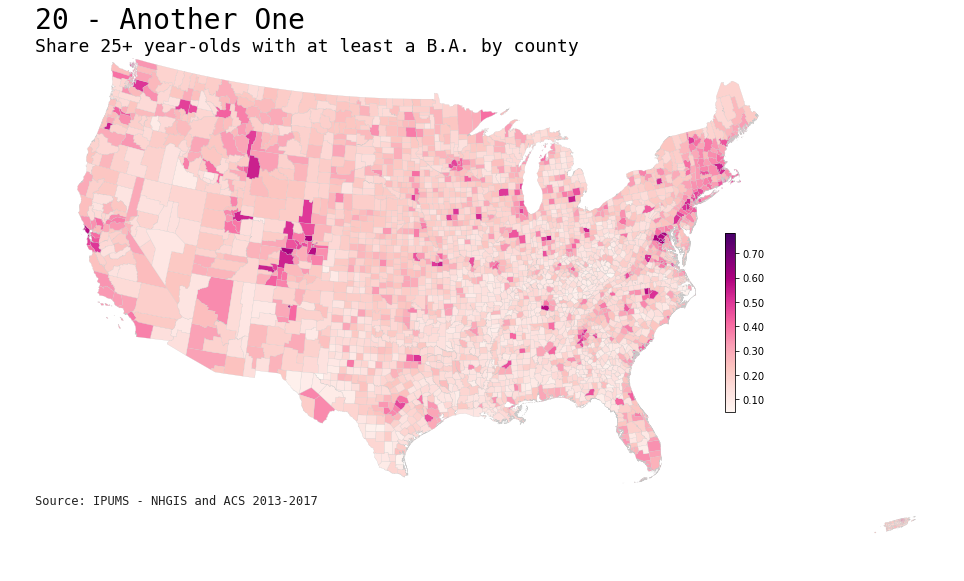

In [30]:
# for insta
fig, ax = plt.subplots(1, figsize=(13.50, 10.80))

mainland_4326.plot(column='BA_share', cmap='RdPu', linewidth=0.2, ax=ax, edgecolor='#c8c8c8', legend = False,);
ax.axis('off');

# Now adding the colorbar
mappable = ax.collections[0]
cbaxes = fig.add_axes([0.75, 0.35, 0.01, 0.23]) 
fig.colorbar(mappable,cax = cbaxes, shrink = 0.5, format = '%.2f')

ax.set_title("20 - Another One", fontdict= {'fontsize': '28', 'fontweight': '5', 'fontfamily': 'monospace'}, loc = 'left', );
ax.annotate('Source: IPUMS - NHGIS and ACS 2013-2017', xy=(0., .12), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#222222', fontfamily='monospace');
ax.annotate('Share 25+ year-olds with at least a B.A. by county', xy=(0, .995), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 18, color = '#000000', fontfamily='monospace');

plt.tight_layout()

plt.savefig("../reports/figures/final/20 - Another One.png", dpi=400)